In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
sns.set()
attributes = pd.read_csv('../data/japan/attributes.csv')
wfs = np.load('../data/japan/waveforms.npy')

input_file = '/mnt/Petabyte/GriMP/HS4_event_data_10_40ms_detrend_50kHz.h5'

grimp = h5py.File(input_file,'r')

FileNotFoundError: [Errno 2] No such file or directory: '../data/japan/attributes.csv'

In [ ]:
attributes

,i_wf,dist,ev_dep,hypocentre_latitude,hypocentre_longitude,is_shallow_crustal,log10snr,mag,vs30,pga_v
0,0,69.619144,8.78,37.0372,139.3803,1.0,2.421425,4.500000,163.761468,NaN
1,1,55.856637,8.78,37.0372,139.3803,1.0,2.953881,4.500000,398.941449,0.079537
2,2,30.489178,8.78,37.0372,139.3803,1.0,4.935676,4.500000,295.401919,0.096053
3,3,10.019795,8.78,37.0372,139.3803,1.0,7.161131,4.500000,385.047847,3.546388
4,4,48.531153,8.78,37.0372,139.3803,1.0,2.647918,4.500000,313.306452,0.050339
...,...,...,...,...,...,...,...,...,...,...
52071,211750,159.218100,10.00,32.7900,130.7500,1.0,2.626319,7.036246,1387.665198,0.106908
52072,211751,150.031299,10.00,32.7900,130.7500,1.0,2.946973,7.036246,351.457207,0.224619
52073,211752,150.575518,10.00,32.7900,130.7500,1.0,2.817592,7.036246,341.642483,0.200211
52074,211753,164.806232,10.00,32.7900,130.7500,1.0,2.843265,7.036246,548.780488,0.122895


In [ ]:
wfs_df = pd.DataFrame(wfs)

In [ ]:
mags = attributes['mag']
mags.describe()

count    52076.000000
mean         5.121467
std          0.574517
min          4.500000
25%          4.700000
50%          4.954149
75%          5.444781
max          7.036246
Name: mag, dtype: float64

<Axes: xlabel='mag', ylabel='Count'>

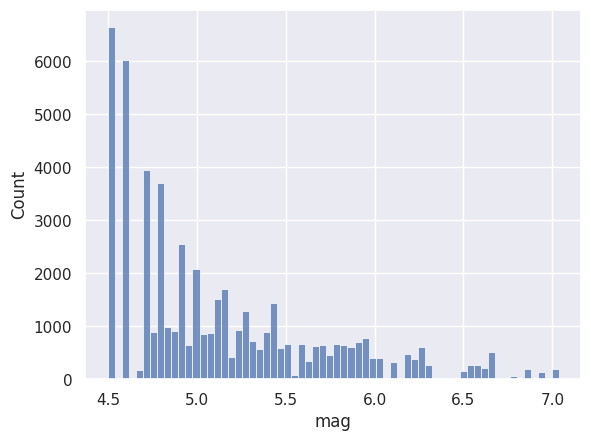

In [ ]:
sns.histplot(mags)

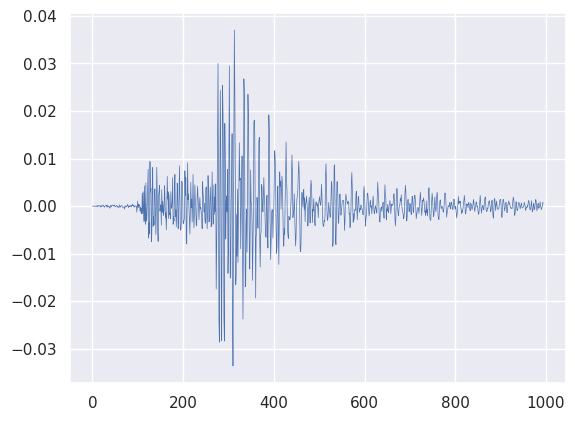

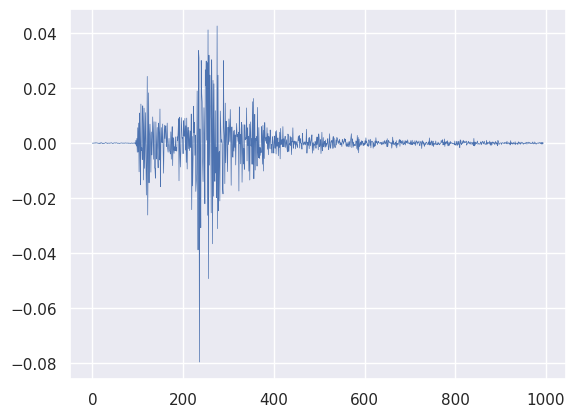

In [ ]:
wfs_0 = pd.DataFrame(wfs[:, 5:])
for i in range(2):
    wfs_0.iloc[i].plot(lw=0.5)
    plt.show()

In [ ]:
mm_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [ ]:
wfs_df.shape

(52076, 1000)

In [ ]:
attributes['dist']

0         69.619144
1         55.856637
2         30.489178
3         10.019795
4         48.531153
            ...    
52071    159.218100
52072    150.031299
52073    150.575518
52074    164.806232
52075    171.014921
Name: dist, Length: 52076, dtype: float64

In [ ]:
wfs_mag_5 = attributes[attributes['mag'] == 5.0]


In [ ]:
wfs_mag_5

,i_wf,dist,ev_dep,hypocentre_latitude,hypocentre_longitude,is_shallow_crustal,log10snr,mag,vs30,pga_v
26030,102261,13.936219,10.00,35.0000,139.2000,1.0,-0.094526,5.0,242.584988,NaN
26031,102563,101.620654,4.69,34.9602,139.1748,1.0,0.306993,5.0,129.151292,NaN
26032,102564,90.435090,4.69,34.9602,139.1748,1.0,inf,5.0,218.271605,NaN
26033,102565,62.714829,4.69,34.9602,139.1748,1.0,1.186497,5.0,133.659731,NaN
26034,102566,86.516336,4.69,34.9602,139.1748,1.0,2.043894,5.0,157.894737,NaN
...,...,...,...,...,...,...,...,...,...,...
28852,117372,127.617023,16.95,35.8775,140.9613,1.0,1.186678,5.0,343.678161,0.034794
28853,117373,119.638141,16.95,35.8775,140.9613,1.0,1.823006,5.0,573.596358,0.103547
28854,117374,143.439724,16.95,35.8775,140.9613,1.0,2.038348,5.0,849.005135,0.042776
28855,117375,110.487035,16.95,35.8775,140.9613,1.0,2.332075,5.0,213.197970,0.253691


In [ ]:
x_len = len(wfs[0, :])
sampling_freq = 20 # Hz
t_tot = x_len / sampling_freq
step = 1.0 / sampling_freq


x = np.arange(0, t_tot, step=step)
y = wfs_df.loc[28852]

plt.xlim([0, 60])
plt.xlabel('Time [s]')
plt.ylabel('Log-Amplitude')
plt.plot(x, y, lw=0.5)

NameError: name 'wfs' is not defined

In [ ]:
import h5py
input_file = '../data/japan/wforms_GAN_input_v20220805.h5'

h5_file = h5py.File(input_file, "r")

In [ ]:
wfs_raw = h5_file['waveforms']

In [ ]:
wfs_raw[0, 0, :]

array([            nan,  1.05934023e-05,  5.61694387e-06, ...,
       -8.80294471e-05,  1.37721099e-05,  6.45540299e-05])